# Reconocimiento de Instrumento Principal en una Señal de Audio

Este notebook busca desarrollar un algoritmo para detectar el instrumento principal en una señal de audio.

## El Dataset

Será usado el IRMAS Dataset (https://www.upf.edu/web/mtg/irmas).

El dataset se divide en datos de entrenamiento y prueba.

### Datos de entrenamiento

**Archivos de audio:** 6705 archivos de audio en formato wav estéreo de 16 bits muestreados a 44.1kHz. Son extractos de 3 segundos de más de 2000 grabaciones distintas.

**Anotaciones:** la indicación del instrumento predominante de cada extracto está tanto en el nombre de la carpeta contenedora como en el nombre del archivo: cello (cel), clarinete (cla), flauta (flu), guitarra acústica (gac), guitarra eléctrica (gel), órgano (org), piano (pia), saxofón (saxo), trompeta (tru), violín (vio) y voz humana (voi). El número de archivos por instrumento es: cel(388), cla(505), flu(451), gac(637), gel(760), org(682), pia(721), sax(626), tru(577), vio(580), voi(778).

Además, algunos de los archivos tienen una anotación en el nombre del archivo con respecto a la presencia ([dru]) o no presencia ([nod]) de la batería, y el género musical: country-folk ([cou_fol]), classical ([cla]) , pop-rock ([pop-roc]), latin-soul ([lat-sou]).

El dataset incluye música actual y del siglo pasado, por lo que se percibe la difierecia en la calidad de audio de algunos extractos. Además, abarca una gran variabilidad en los tipos de instrumentos musicales, intérpretes, articulaciones, así como estilos generales de grabación y producción. Además, tratamos de maximizar la distribución de los géneros musicales dentro de la colección para evitar la extracción de información relacionada con las características del género. Se pagó a dos estudiantes para obtener los datos de 11 instrumentos de las pistas de música preseleccionadas, con el objetivo de extraer extractos que contengan una presencia continua de un único instrumento de destino predominante. Por lo tanto, no se permitió asignar más de un instrumento a un extracto dado.

### Datos de prueba

**Audio:** 2874 extractos en formato wav estéreo de 16 bits muestreados a 44.1kHz.

**Archivos de anotación:** Las anotaciones para un extracto llamado: "excerptName.wav" se dan en "excerptName.txt". Se puede anotar más de un instrumento en cada extracto, una etiqueta por línea.

# Empecemos con el notebook!

# Imports iniciales

In [1]:
# Preaparando los imports
import os
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Prueba de lectura
rate, data = wav.read("C:/Users/pedri/Downloads/IRMAS-Sample/Training/sax/118__[sax][nod][jaz_blu]1702__3.wav")

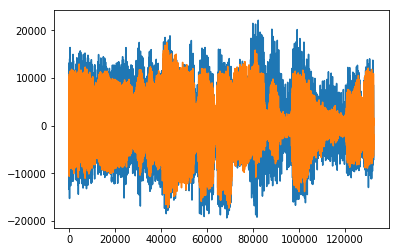

In [3]:
%matplotlib inline
plt.plot(data)
plt.show()

**Nota:** La señal es stereo... Luego observo si esto tiene algún impacto

In [4]:
# Probando la lectura de varios archivos

base_directory = "C:/Users/pedri/Downloads/IRMAS-Sample/Training/"

for path, dirs, files in os.walk(base_directory):
    for filename in files:
        s = path.split("/")[-1]
        print(s)
        print(os.path.join(path, filename))

sax
C:/Users/pedri/Downloads/IRMAS-Sample/Training/sax\118__[sax][nod][jaz_blu]1702__3.wav
vio
C:/Users/pedri/Downloads/IRMAS-Sample/Training/vio\001__[vio][nod][cou_fol]2194__1.wav
vio
C:/Users/pedri/Downloads/IRMAS-Sample/Training/vio\134__[vio][nod][cla]2156__3.wav


In [12]:
# Preparar el dataset
start_dir = "C:/Users/pedri/Downloads/IRMAS-Sample/Training/"

dataset = list()

for path, dirs, files in os.walk(start_dir):
    for filename in files:
        row = dict()
        instrument = path.split("/")[-1]
        rate, audio_signal = wav.read(os.path.join(path, filename))
        row["instrument"] = instrument
        row["audio"] = audio_signal
        dataset.append(row)

training_data = pd.DataFrame(dataset)

In [14]:
training_data

,audio,instrument
0,"[[1230, -3317], [1334, -3267], [2036, -2484], ...",sax
1,"[[27, 3611], [141, 3643], [41, 3420], [-140, 3...",vio
2,"[[636, 655], [491, 518], [414, 435], [372, 397...",vio


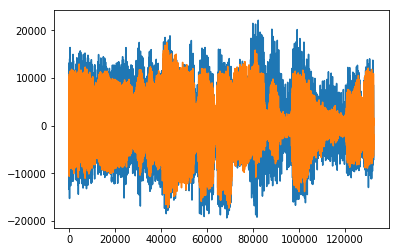

In [16]:
%matplotlib inline
plt.plot(training_data['audio'][0])
plt.show()

**Nota:** Lista la carga de archivos "básica", todavía hace falta estudiar si hacen falta parametros del filename